In [1]:
# @toffanetto
import numpy as np
import logistic_regression_classification as cl
import matplotlib.pyplot as plt

/home/toffanetto/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Getting train data
X_train, y_train = cl.getData(train=True, raw= False)

# Getting test data
X_test, y_test = cl.getData(train=False, raw= False)

In [3]:
# Plotting classes balancing



In [4]:
# Training
EPOCHS = 100
W, hit_train, hit_val, J_train, J_val = cl.trainClassifier(X=X_train,y=y_train,epochs=EPOCHS,batch=False)


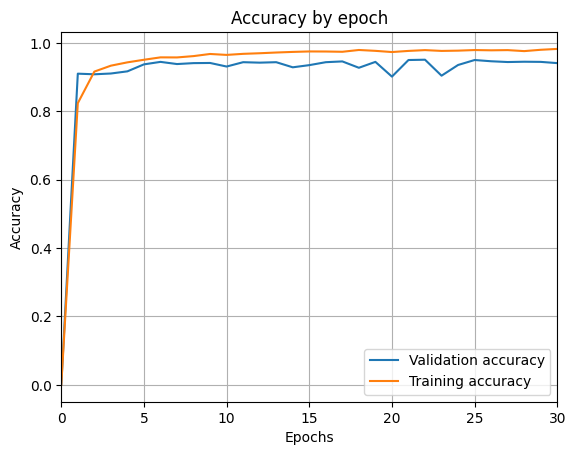

In [5]:
plt.figure()
plt.plot(hit_val, label='Validation accuracy')
plt.plot(hit_train, label='Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy by epoch")
plt.legend(loc='lower right')
plt.xlim([0,EPOCHS])
plt.grid()

#plt.savefig("../plot/LR_1/Accuracy_by_epoch_batch.pdf", format="pdf", bbox_inches="tight")

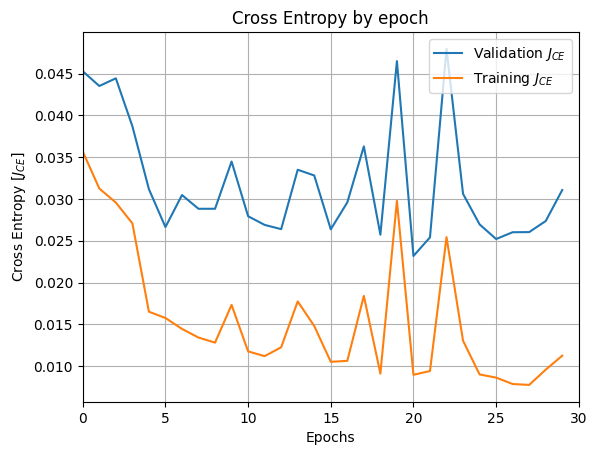

In [6]:
plt.figure()
plt.plot(J_val, label=r'Validation $J_{CE}$')
plt.plot(J_train, label=r'Training $J_{CE}$')
plt.xlabel("Epochs")
plt.ylabel(r"Cross Entropy [$J_{CE}$]")
plt.title("Cross Entropy by epoch")
plt.legend(loc='upper right')
plt.xlim([0,EPOCHS])
plt.grid()

#plt.savefig("../plot/LR_1/CE_by_epoch.pdf", format="pdf", bbox_inches="tight")

In [7]:
# Testing

y_test_hat, class_y_hat = cl.classify(x=X_test,W=W)

# for i in range(len(y_test)):
#     print('| '+str(y_test[i])+' -> '+str(class_y_hat[i]))

confusion_matrix, hit_rate, not_hit_rate = cl.rateModel(y=y_test,y_hat=class_y_hat)

print('Confusion Matrix: \n'+str(confusion_matrix))
print('hit_rate = '+str(hit_rate))


Confusion Matrix: 
[[488.   1.   7.   0.   0.   0.]
 [ 44. 427.   0.   0.   0.   0.]
 [ 28.  33. 357.   0.   2.   0.]
 [  0.   2.   0. 366. 123.   0.]
 [  0.   0.   0.   4. 528.   0.]
 [  0.   0.   0.   0.   8. 529.]]
hit_rate = 0.9144893111638955


In [8]:
# GENERATOR

GENERATOR = False

if(GENERATOR):
    ###### 1

    EPOCHS = 300
    bat = 'Batch'
    val = 'Holdout'
    W, hit_train, hit_val, J_train, J_val = cl.trainClassifier(X=X_train,y=y_train,epochs=EPOCHS,batch=True)

    plt.figure()
    plt.plot(hit_val, label='Validation accuracy')
    plt.plot(hit_train, label='Training accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Accuracy by epoch")
    plt.legend(loc='lower right')
    plt.xlim([0,EPOCHS])
    plt.grid()

    plt.savefig("../plot/LR_1/Accuracy_by_epoch-Batch-300.pdf", format="pdf", bbox_inches="tight")

    plt.figure()
    plt.plot(J_val, label=r'Validation $J_{CE}$')
    plt.plot(J_train, label=r'Training $J_{CE}$')
    plt.xlabel("Epochs")
    plt.ylabel(r"Cross Entropy [$J_{CE}$]")
    plt.title("Cross Entropy by epoch")
    plt.legend(loc='upper right')
    plt.xlim([0,EPOCHS])
    plt.grid()

    plt.savefig("../plot/LR_1/CE_by_epoch-Batch-300.pdf", format="pdf", bbox_inches="tight")

    # Testing

    y_test_hat, class_y_hat = cl.classify(x=X_test,W=W)

    confusion_matrix, hit_rate, not_hit_rate = cl.rateModel(y=y_test,y_hat=class_y_hat)

    print('Epochs: '+str(EPOCHS)+' | Training type: '+str(bat)+' | Validation type: '+str(val))
    print('Confusion Matrix: \n'+str(confusion_matrix))
    print('hit_rate = '+str(hit_rate))

    ###### 2

    EPOCHS = 200
    bat = 'Step-by-Step'
    val = 'Holdout'
    W, hit_train, hit_val, J_train, J_val = cl.trainClassifier(X=X_train,y=y_train,epochs=EPOCHS,batch=False)

    plt.figure()
    plt.plot(hit_val, label='Validation accuracy')
    plt.plot(hit_train, label='Training accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Accuracy by epoch")
    plt.legend(loc='lower right')
    plt.xlim([0,EPOCHS])
    plt.grid()

    plt.savefig("../plot/LR_1/Accuracy_by_epoch-Step-200.pdf", format="pdf", bbox_inches="tight")

    plt.figure()
    plt.plot(J_val, label=r'Validation $J_{CE}$')
    plt.plot(J_train, label=r'Training $J_{CE}$')
    plt.xlabel("Epochs")
    plt.ylabel(r"Cross Entropy [$J_{CE}$]")
    plt.title("Cross Entropy by epoch")
    plt.legend(loc='upper right')
    plt.xlim([0,EPOCHS])
    plt.grid()

    plt.savefig("../plot/LR_1/CE_by_epoch-Step-200.pdf", format="pdf", bbox_inches="tight")

    # Testing

    y_test_hat, class_y_hat = cl.classify(x=X_test,W=W)

    confusion_matrix, hit_rate, not_hit_rate = cl.rateModel(y=y_test,y_hat=class_y_hat)

    print('Epochs: '+str(EPOCHS)+' | Training type: '+str(bat)+' | Validation type: '+str(val))
    print('Confusion Matrix: \n'+str(confusion_matrix))
    print('hit_rate = '+str(hit_rate))
